# 重回帰分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
dataset = load_boston()

In [4]:
x,t = dataset.data,dataset.target
columns = dataset.feature_names

In [5]:
type(x),x.shape

(numpy.ndarray, (506, 13))

In [6]:
type(t),t.shape

(numpy.ndarray, (506,))

In [7]:
df = pd.DataFrame(x,columns=columns)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df['Target'] = t
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df['Target']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [11]:
t = df['Target'].values

In [12]:
x = df.drop(labels=['Target'], axis=1).values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,t_train,t_test = train_test_split(x,t,test_size=0.3,random_state=0)

In [15]:
len(x_test)

152

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model

LinearRegression()

In [19]:
model.fit(x_train,t_train)

LinearRegression()

In [20]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

<BarContainer object of 13 artists>

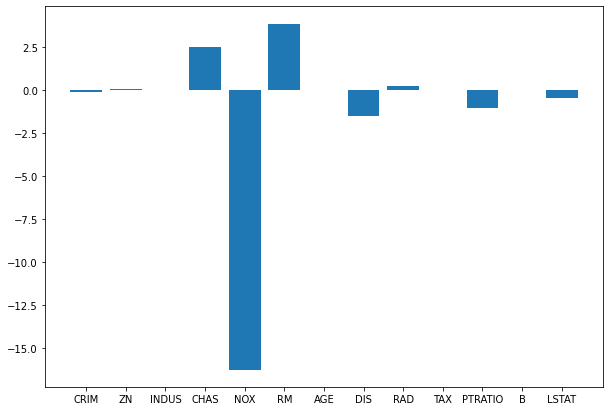

In [21]:
plt.figure(figsize=(10,7))
plt.bar(x=columns, height=model.coef_)

In [22]:
model.intercept_

37.937107741832314

In [23]:
print(f'train score: {model.score(x_train,t_train)}')
print(f'train score: {model.score(x_test,t_test)}')


train score: 0.7645451026942549
train score: 0.6733825506400205


In [24]:
y = model.predict(x_test)

In [25]:
x_test.shape

(152, 13)

In [26]:
print(f'予測値:{y[1]}')
print(f'目標値:{t_test[1]}')

予測値:23.751631640748244
目標値:50.0


In [27]:
df = pd.read_csv('regression_pls.csv')

In [28]:
df.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1


In [29]:
df.shape

(1290, 197)

In [30]:
t = df['Target'].values
x = df.drop('Target',axis=1).values

In [31]:
t.shape

(1290,)

In [32]:
x.shape

(1290, 196)

In [33]:
x_train,x_test,t_train,t_test = train_test_split(x,t,test_size=0.3,random_state=0)

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train, t_train)

LinearRegression()

In [36]:
print(f'train score: {model.score(x_train,t_train)}')
print(f'test score: {model.score(x_test,t_test)}')

train score: 0.9365473140074598
test score: -0.010309400665467372


In [37]:
df_corr = df.corr()

<AxesSubplot:>

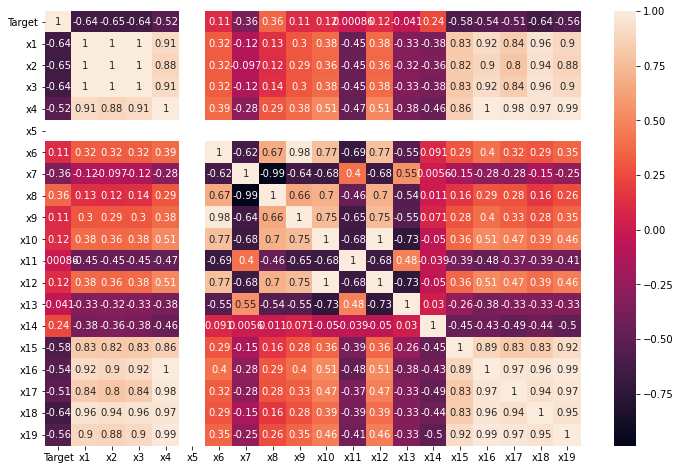

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.iloc[:20,:20],annot=True)

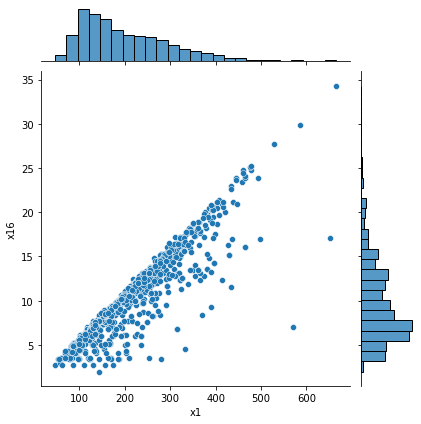

In [39]:
sns.jointplot(x='x1',y='x16', data=df)

In [40]:
from sklearn.cross_decomposition import PLSRegression

In [48]:
pls = PLSRegression(n_components=11)

In [49]:
pls.fit(x_train, t_train)

PLSRegression(n_components=11)

In [50]:
print(f'train score: {pls.score(x_train,t_train)}')
print(f'test score: {pls.score(x_test,t_test)}')

train score: 0.9157705245807128
test score: 0.8839475118318949
